# importing library

In [1]:
from __future__ import print_function
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import keras
from keras import optimizers
import pydot
import multiprocessing
from keras.utils import plot_model
from keras.models import Model,load_model
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten, Activation, GlobalAveragePooling2D,concatenate, AveragePooling2D, Concatenate,Input,Conv2D, MaxPooling2D,BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from PIL import Image , ImageOps
from keras.applications.inception_v3 import InceptionV3
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.resnet50 import ResNet50
import random , os , math 
import tensorflow as tf
import numpy as np
# import densenet
import os
from shutil import copyfile
from tensorflow.python.framework import graph_util
from keras.backend.tensorflow_backend import set_session

Using TensorFlow backend.


# CNN Architecture

In [2]:
def block1(x):
    x1 = Conv2D(filters=32, kernel_size=(3,3),strides=2,padding='same' , activation='relu')(x)
    x1 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones')(x1)
    x1 = Activation('relu')(x1)

    x1 = Conv2D(filters=32, kernel_size=(3,3),strides=1,padding='same' , activation='relu')(x1)
    x1 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones')(x1)
    x1 = Activation('relu')(x1)

    x1 = Conv2D(filters=32, kernel_size=(3,3),strides=1,padding='same' , activation='relu')(x1)
    x1 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones')(x1)
    x1 = Activation('relu')(x1)
    
    x2 = Conv2D(filters=32, kernel_size=(3,3),strides=2,padding='same' , activation='relu')(x)
    x2 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones')(x2)
    x2 = Activation('relu')(x2)

    x2 = Conv2D(filters=32, kernel_size=(3,3),strides=1,padding='same' , activation='relu')(x2)
    x2 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones')(x2)
    x2 = Activation('relu')(x2)

    x3 = AveragePooling2D(pool_size=(2, 2), strides=None, data_format=None)(x)
    
    x3 = Conv2D(filters=32, kernel_size=(3,3),strides=1,padding='same' ,activation='relu')(x3)
    x3 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones')(x3)
    x3 = Activation('relu')(x3)
    
    x4 = Conv2D(filters=32, kernel_size=(3,3),strides=2,padding='same' , activation='relu')(x)
    x4 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones')(x4)
    x4 = Activation('relu')(x4)
    
    final = concatenate([x1,x2,x3,x4],axis=-1,name='block1_concat')
    
    return final


def block2(x):
    x1 = Conv2D(filters=32, kernel_size=(3,3),strides=2,padding='same' , activation='relu')(x)
    x1 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones')(x1)
    x1 = Activation('relu')(x1)

    x1 = Conv2D(filters=32, kernel_size=(3,3),strides=1,padding='same' , activation='relu')(x1)
    x1 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones')(x1)
    x1 = Activation('relu')(x1)

    x1 = Conv2D(filters=32, kernel_size=(3,3),strides=1,padding='same' , activation='relu')(x1)
    x1 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones')(x1)
    x1 = Activation('relu')(x1)

    x1 = Conv2D(filters=32, kernel_size=(3,3),strides=1,padding='same' , activation='relu')(x1)
    x1 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones')(x1)
    x1 = Activation('relu')(x1)

    x1 = Conv2D(filters=32, kernel_size=(3,3),strides=1,padding='same' , activation='relu')(x1)
    x1 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones')(x1)
    x1 = Activation('relu')(x1)

    x2 = Conv2D(filters=32, kernel_size=(3,3),strides=2,padding='same' , activation='relu')(x)
    x2 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones')(x2)
    x2 = Activation('relu')(x2)

    x2 = Conv2D(filters=32, kernel_size=(3,3),strides=1,padding='same' , activation='relu')(x2)
    x2 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones')(x2)
    x2 = Activation('relu')(x2)

    x2 = Conv2D(filters=32, kernel_size=(3,3),strides=1,padding='same' , activation='relu')(x2)
    x2 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones')(x2)
    x2 = Activation('relu')(x2)

    x3 = AveragePooling2D(pool_size=(2, 2), strides=None, data_format=None)(x)
    
    x3 = Conv2D(filters=32, kernel_size=(3,3),strides=1,padding='same' ,activation='relu')(x3)
    x3 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones')(x3)
    x3 = Activation('relu')(x3)
    
    x4 = Conv2D(filters=32, kernel_size=(3,3),strides=2,padding='same' , activation='relu')(x)
    x4 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones')(x4)
    x4 = Activation('relu')(x4)
    
    final = concatenate([x1,x2,x3,x4],axis=-1,name='block2_concat')
    
    return final




def block3(x):
    x1 = Conv2D(filters=32, kernel_size=(3,3),strides=2,padding='same' , activation='relu')(x)
    x1 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones')(x1)
    x1 = Activation('relu')(x1)

    x1 = Conv2D(filters=32, kernel_size=(3,3),strides=1,padding='same' , activation='relu')(x1)
    x1 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones')(x1)
    x1 = Activation('relu')(x1)

    # branching happen here
    
    #sub branch one start
    x1_1 = Conv2D(filters=32, kernel_size=(3,3),strides=1,padding='same' , activation='relu')(x1)
    x1_1 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones')(x1_1)
    x1_1 = Activation('relu')(x1_1)
    #sub branch one end
    
    #sub branch two start
    x1_2 = Conv2D(filters=32, kernel_size=(3,3),strides=1,padding='same' , activation='relu')(x1)
    x1_2 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones')(x1_2)
    x1_2 = Activation('relu')(x1_2)
    #sub branch one end
    
    branchoneConcat = concatenate([x1_1,x1_2],axis=-1)
    
    
    # branch two start here
    x2 = Conv2D(filters=32, kernel_size=(3,3),strides=2,padding='same' , activation='relu')(x)
    x2 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones')(x2)
    x2 = Activation('relu')(x2)

        #sub branch two start
    x2_1 = Conv2D(filters=32, kernel_size=(3,3),strides=1,padding='same' , activation='relu')(x2)
    x2_1 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones')(x2_1)
    x2_1 = Activation('relu')(x2_1)

        #sub branch two start
    x2_2 = Conv2D(filters=32, kernel_size=(3,3),strides=1,padding='same' , activation='relu')(x2)
    x2_2 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones')(x2_2)
    x2_2 = Activation('relu')(x2_2)

    branchtwoConcat = concatenate([x2_1,x2_2],axis=-1)
    
    
    
    x3 = AveragePooling2D(pool_size=(2, 2), strides=None, data_format=None)(x)
    
    x3 = Conv2D(filters=32, kernel_size=(3,3),strides=1,padding='same' ,activation='relu')(x3)
    x3 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones')(x3)
    x3 = Activation('relu')(x3)
    
    x4 = Conv2D(filters=32, kernel_size=(3,3),strides=2,padding='same' , activation='relu')(x)
    x4 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones')(x4)
    x4 = Activation('relu')(x4)
    
    
    final = concatenate([branchoneConcat,branchtwoConcat,x3,x4],axis=-1,name='block3_concat')
    
    return final



In [3]:
def createModel8():
    ModelInput = Input(shape=(224,224,3), name = 'input_0')
    x = Conv2D(filters=32, kernel_size=(3,3),strides=2, activation='relu')(ModelInput)
    x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones')(x)
    x = Activation('relu')(x)
    
#     x = Conv2D(filters=32, kernel_size=(3,3),strides=1, activation='relu')(x)
#     x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones')(x)
#     x = Activation('relu')(x)

    x = Conv2D(filters=64, kernel_size=(3,3),strides=1, activation='relu')(x)
    x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones')(x)
    x = Activation('relu')(x)
    
    x = MaxPooling2D(pool_size=(3,3), strides=2)(x)

    x = Conv2D(filters=80, kernel_size=(3,3),strides=1, activation='relu')(x)
    x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=192, kernel_size=(3,3),strides=1, activation='relu')(x)
    x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones')(x)
    x = Activation('relu')(x)
    
    x = MaxPooling2D(pool_size=(3,3), strides=2)(x)
    # auxialiary output 
    aux_out_0 = GlobalAveragePooling2D()(x)
    output0 = Dense(48,activation='softmax')(aux_out_0)
    
    block_1_output = block1(x)
    
    aux_out_1 = GlobalAveragePooling2D()(block_1_output)
    output1 = Dense(48,activation='softmax')(aux_out_1)

    block_2_output = block2(block_1_output)
    
    aux_out_2 = GlobalAveragePooling2D()(block_2_output)
    output2 = Dense(48,activation='softmax')(aux_out_2)


    block_3_output = block3(block_2_output)
    
    GAP = GlobalAveragePooling2D()(block_3_output)
    
    final_output = Dense(48,activation='softmax')(GAP)
    
    model = Model(inputs=ModelInput, outputs=[final_output,output0,output1,output2])
    return model

#model = createModel8()
#plot_model(model, to_file='ourmodelchanged.png',show_shapes=True)
#SVG(model_to_dot(model).create(prog='dot',format='svg'))

# Generator

# Parameters

In [4]:
batch_size=48
num_of_training_example = 33599
num_of_Val_example =14400
initial_epoch_enter = 0

In [23]:
traindatagen = ImageDataGenerator(
        rescale=1./255,
        featurewise_center=False,
        featurewise_std_normalization=False,
        shear_range=0.2,
        zoom_range=0.2,
        #horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        './DATASET/Training',
        target_size=(224, 224),
        batch_size=batch_size,
        #save_to_dir='./Augmented/Training',
        save_prefix='aug', 
        save_format='jpg',
        class_mode='categorical',
        shuffle=True
      )

validation_generator = test_datagen.flow_from_directory(
        './DATASET/Validation',
        target_size=(224, 224),
        batch_size=batch_size,
        #save_to_dir='./Augmented/Validation',
        save_prefix='aug', 
        save_format='jpg',
        class_mode='categorical',
        shuffle=False
    )

# for (x,y) in train_generator:
#     print(x.shape,type(y),len(y),y.shape)
#     break


Found 33599 images belonging to 48 classes.
Found 14400 images belonging to 48 classes.


# Creating multiple output generator

In [25]:
def CreateMultiOutValidationGen():
    for (X,Y) in validation_generator:
        yield X,[Y,Y,Y,Y]
        
def CreateMultiOutTrainingGen():
    for (X,Y) in train_generator:
        yield X,[Y,Y,Y,Y]

# Training and Testing

In [ ]:
tf.reset_default_graph()
K.clear_session()
def do_training():
    epochs = 30

    checkpoint_path = "training_9/Checkpoints/cp-{epoch:04d}.ckpt"

    checkpoint_dir = os.path.dirname(checkpoint_path)

    # Create checkpoint callback
    cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                     #save_weights_only=True,
                                                     #save_best_only = True,
                                                     verbose=1,period=1)

    TB = keras.callbacks.TensorBoard(log_dir='./ChangedGraph/log2s', histogram_freq=0, batch_size=batch_size, write_graph=True, write_grads=False, write_images=True, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None, update_freq='epoch')

    model = createModel8()
    model.compile(loss="categorical_crossentropy", optimizer="adadelta", metrics=["accuracy"],loss_weights=[1., 0.2 , 0.4 , 0.6])
    #model.load_weights("training_9/Checkpoints/cp-0008.ckpt")

    image_dim = (224, 224, 3)

    #model = densenet.DenseNet(classes=65, input_shape=image_dim, depth=19, growth_rate=12,bottleneck=True, reduction=0.5)
    #print(model.summary())
    
    result = model.fit_generator(
            CreateMultiOutTrainingGen(),
            steps_per_epoch = num_of_training_example//batch_size,
            callbacks=[cp_callback,TB],
            epochs=epochs,
            workers=1,
            max_q_size=1,
            validation_data=CreateMultiOutValidationGen(),
            validation_steps=num_of_Val_example//batch_size,
            initial_epoch=initial_epoch_enter
    )
    return result

result= do_training()
#result=0
#result = multiprocessing.Process(target=do_training(result))
#result.start()
#result.join()


/home/undercover/anaconda3/envs/indianFood/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., steps_per_epoch=699, callbacks=[<tensorfl..., epochs=30, workers=1, validation_data=<generator..., validation_steps=300, initial_epoch=0, max_queue_size=1)`


Epoch 1/30
 92/699 [==>...........................] - ETA: 26:32 - loss: 8.5134 - dense_4_loss: 3.8554 - dense_1_loss: 4.0054 - dense_2_loss: 3.8685 - dense_3_loss: 3.8493 - dense_4_acc: 0.0394 - dense_1_acc: 0.0401 - dense_2_acc: 0.0344 - dense_3_acc: 0.0426

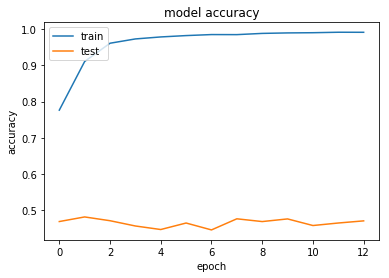

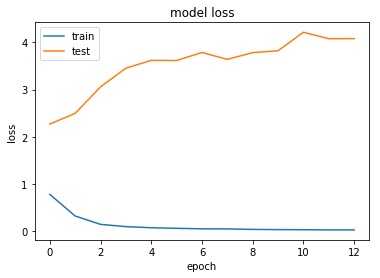

In [11]:
history = result
import matplotlib.pyplot as plt
#print(result.result.keys())
# summarize history for accuracy
plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


epochs = 25
initial_lrate = 0.01

def decay(epoch, steps=100):
    initial_lrate = 0.01
    drop = 0.96
    epochs_drop = 8
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

sgd = SGD(lr=initial_lrate, momentum=0.9, nesterov=False)

lr_sc = LearningRateScheduler(decay, verbose=1)

model.compile(loss=['categorical_crossentropy', 'categorical_crossentropy', 'categorical_crossentropy'], loss_weights=[1, 0.3, 0.3], optimizer=sgd, metrics=['accuracy'])

In [4]:
model = densenet.DenseNet(classes=65, input_shape=(224,224,3), depth=19, growth_rate=12,bottleneck=True, reduction=0.5)
model.load_weights('training_4/Checkpoints/cp-0010.ckpt')

In [5]:
model.save('newModel.h5')

In [ ]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

In [16]:
print(len(validation_generator))

635


In [17]:
#score = model.evaluate(train_generator, validation_data)

model.compile(loss="categorical_crossentropy", optimizer="adadelta", metrics=["accuracy"])
score= model.evaluate_generator(validation_generator, max_queue_size=10)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.9698621852025107
Test accuracy: 0.27411728183425316


In [44]:
model.history['acc']

AttributeError: 'Model' object has no attribute 'history'

In [41]:
predicted= model.predict_generator(validation_generator)

In [42]:
#predicted[0]
#y_pred = np.rint(predicted)
#y_true = validation_generator.classes
#print (classification_report(y_true, y_pred))

In [43]:
from sklearn.metrics import classification_report 
from keras.utils import np_utils
y_curr = np.zeros(6344)
for i in range(0,6344):
    index = np.argmax(predicted[i])
    y_curr[i] = index

y_test= validation_generator.classes

cc = ['Bhindi','Briyani','Naan','Halwa', 'Imarti', 'Chole bhatura', 'Daal makhni', 'jalebi', 'Cachuri', 'Kadi', 'Barfi', 'kheer','kulfi', 'ladoo', 'Pav bhaaji', 'Momos', 'Papad', 'Ras malai', 'Roti', 'Upma', 'Aloo_gobi', 'Aloo_matar', 'Aloo_methi', 'Bajji', 'Bhatura', 'Bonda', 'Butter_Chicken', 'Chaap', 'Chana_masala', 'chicken_65', 'chole_kulche', 'Dahi_bhalla', 'Dahi_Vada', 'dal', 'Dhokla', 'Dosa', 'iddli', 'Kadai_paneer', 'Kabab', 'Khandvi', 'litti_chokha', 'Maggie', 'Malai_kofta', 'Matar_paneer', 'Modak', 'Palak_Paneer', 'Panipuri', 'Paratha', 'Poha', 'Puttu', 'RajmaChawal', 'Rajma', 'Rasam_Rice', 'Rice', 'RoganJosh', 'Sambar', 'Samosa', 'Shahi_paneer', 'Shrikhand', 'Springroll', 'Tandoori_Chicken', 'Thepla', 'Uttapam', 'Vada_pav', 'Vada' ]                                           
print(classification_report(y_test, y_curr,target_names=cc))

                  precision    recall  f1-score   support

          Bhindi       0.37      0.48      0.42        54
         Briyani       0.30      0.22      0.25        97
            Naan       0.27      0.60      0.38       140
           Halwa       0.23      0.82      0.36       523
          Imarti       0.44      0.06      0.11        62
   Chole bhatura       0.29      0.22      0.25       171
     Daal makhni       0.00      0.00      0.00        75
          jalebi       0.00      0.00      0.00        84
         Cachuri       0.56      0.08      0.14        63
            Kadi       0.41      0.17      0.24       215
           Barfi       0.75      0.04      0.07        82
           kheer       0.36      0.53      0.43       172
           kulfi       0.33      0.05      0.09       113
           ladoo       0.00      0.00      0.00        69
      Pav bhaaji       0.14      0.03      0.05        61
           Momos       0.31      0.06      0.10        65
           Pa

In [26]:
from sklearn.metrics import classification_report
y_pred = model.predict(train_generator)

AttributeError: 'DirectoryIterator' object has no attribute 'ndim'

In [ ]:
y_curr = np.zeros(y_pred.shape)
for i in range(0,len(y_pred)):
    index = np.argmax(y_pred[i])
    y_curr[i][index] = 1

target_names = ['Bhindi','Briyani','Naan','Halwa', 'Imarti', 'Chole bhatura', 'Daal makhni', 'jalebi', 'Cachuri', 'Kadi', 'Barfi', 'kheer','kulfi', 'ladoo', 'Pav bhaaji', 'Momos', 'Papad', 'Ras malai', 'Roti', 'Upma', 'Aloo_gobi', 'Aloo_matar', 'Aloo_methi', 'Bajji', 'Bhatura', 'Bonda', 'Butter_Chicken', 'Chaap', 'Chana_masala', 'chicken_65', 'chole_kulche', 'Dahi_bhalla', 'Dahi_Vada', 'dal', 'Dhokla', 'Dosa', 'iddli', 'Kadai_paneer', 'Kabab', 'Khandvi', 'litti_chokha', 'Maggie', 'Malai_kofta', 'Matar_paneer', 'Modak', 'Palak_Paneer', 'Panipuri', 'Paratha', 'Poha', 'Puttu', 'RajmaChawal', 'Rajma', 'Rasam_Rice', 'Rice', 'RoganJosh', 'Sambar', 'Samosa', 'Shahi_paneer', 'Shrikhand', 'Springroll', 'Tandoori_Chicken', 'Thepla', 'Uttapam', 'Vada_pav', 'Vada' ]                                           
print(classification_report(y_test, y_curr,target_names=target_names))

In [32]:
model = load_model('my_modelF.h5')
#score = model.evaluate(X_test, Y_test, verbose=0)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])
print(model.history.keys())

AttributeError: 'Model' object has no attribute 'history'

In [11]:
model = load_model('saveModel.h5')
def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    from tensorflow.python.framework.graph_util import convert_variables_to_constants
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        frozen_graph = convert_variables_to_constants(session, input_graph_def,output_names, freeze_var_names)
        return frozen_graph
    
    
frozen_graph = freeze_session(K.get_session(),output_names=[out.op.name for out in model.outputs])
tf.train.write_graph(frozen_graph, "./training", "my_model.pb", as_text=False)

INFO:tensorflow:Froze 1920 variables.
INFO:tensorflow:Converted 1920 variables to const ops.


'./training/my_model.pb'

In [49]:
from keras.models import load_model

model.save('my_modelFF.h5')

# Creating train and test set

In [4]:
# Creation of Test data
def createDataSplit():
    input_folder = './DataSet'
    
    percent = 0.7
    ListFolder = os.listdir('./DataSet')

    for classes in ListFolder:
        print(classes,' ',end = '')
        imagePath = input_folder+'/'+classes
        class_data = []
        class_data_name = []
        try:
            a = os.listdir(imagePath)
        except:
            print('Wrong')
            continue
        for images in os.listdir(imagePath):
            try:
                im = Image.open(imagePath+'/'+images)
                imgMat = np.array(im)
                if imgMat.shape[2] == 3: 
                    class_data.append(imgMat)
                    class_data_name.append(imagePath+'/'+images)
                else:
                    print(imgMat.shape)
            except:
                print('LoL')
    #     print(len(class_data))
        sizeofclass = len(class_data)
    
        num_of_Train_exp = math.floor(sizeofclass*(percent))

        X_train = class_data[0:num_of_Train_exp]
        X_test = class_data[num_of_Train_exp:]

        TrainSet = class_data_name[0 : num_of_Train_exp]
        ValidationSet = class_data_name[num_of_Train_exp : ]

        print(sizeofclass,len(TrainSet),len(ValidationSet),end ='')
        

        directory = './DATASET/Training/'+classes
        if not os.path.exists(directory):
            os.makedirs(directory)
        i = 1
        for imagesPath in TrainSet:
            dest2 = directory +'/'+str(i)+'.jpg'
            copyfile(imagesPath, dest2)
            #print(dest2,imagesPath)
            i = i + 1
            

        directory = './DATASET/Validation/'+classes
        if not os.path.exists(directory):
            os.makedirs(directory)
        i = 1
        for imagesPath in ValidationSet:
            dest2 = directory +'/'+str(i)+'.jpg'
            copyfile(imagesPath, dest2)
            #print(dest2,imagesPath)
            i = i + 1
            
#createDataSplit()          

# Garbage Code

In [ ]:
# X_TEST_DATA = []
# Y_TEST_DATA = []

# input_folder_test = './ResizedImg/test'
# for classes in os.listdir(input_folder):
#     imagePath = input_folder+'/'+classes
#     for images in os.listdir(imagePath):
#         im = Image.open(imagePath+'/'+images)
#         imgMat = np.array(im)
#         X_TEST_DATA.append(imgMat)
#         Y_TEST_DATA.append(classes)

# X_TRAIN_DATA = []
# Y_TRAIN_DATA = []

# input_folder_test = './ResizedImg/train'
# for classes in os.listdir(input_folder):
#     imagePath = input_folder+'/'+classes
#     for images in os.listdir(imagePath):
#         im = Image.open(imagePath+'/'+images)
#         imgMat = np.array(im)
#         X_TRAIN_DATA.append(imgMat)
#         Y_TRAIN_DATA.append(classes)

# x_train_F = [item for sublist in x_train for item in sublist]
# y_train_F = [item for sublist in y_train for item in sublist]
# x_test_F  = [item for sublist in x_test for item in sublist]
# y_test_F  = [item for sublist in y_test for item in sublist]

# x_train_w = []
# y_train_w = []
# x_test_w = []
# y_test_w = []

# for img in x_train:
#     try:
#         if img.shape == (224,224,3):
#             x_train_w.append(np.array(img))
#         else:
#             print('wrong',img.shape)
#     except:
#         print('LOL')

# for img in y_train:
#     try:
#         if img.shape == (224,224,3):
#             y_train_w.append(np.array(img))
#         else:
#             print('wrong',img.shape)
#     except:
#         print('LOL')

# for img in x_test:
#     try:
#         if img.shape == (224,224,3):
#             x_test_w.append(np.array(img))
#         else:
#             print('wrong',img.shape)
#     except:
#         print('LOL')

# for img in y_test:
#     try:
#         if img.shape == (224,224,3):
#             y_test_w.append(np.array(img))
#         else:
#             print('wrong',img.shape)
#     except:
#         print('LOL')

# x_train = np.array(x_train_w, dtype=np.float32)
# y_train = np.array(y_train_w, dtype=np.float32)
# x_test  = np.array(x_test_w, dtype=np.float32)
# y_test  = np.array(y_test_w, dtype=np.float32)

# img = Image.fromarray(np.array(X_train[0]))
# img


# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))




# the data, split between train and test sets
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
# print(x_train[0])
# print(len(x_train[0]))
# im = Image.open(x_train[0])
# im.show()
# print('before changing')
# print('x_train shape:', x_train.shape)
# print(x_train.shape[0], 'train samples')
# print(x_test.shape[0], 'test samples')


# if K.image_data_format() == 'channels_first':
#     x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
#     x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
#     print("hola")
# else:
#     print("hola8")
#     x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
#     x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
#     input_shape = (img_rows, img_cols, 1)

# print(x_train[0])
# print(len(x_train[0][0][0]))
# print(x_train[0].shape)
# print(np.zeros((3,3,1)))

# im1 = Image.open("b.jpeg").convert('LA')
# im1 = Image.open("b.jpeg")
# im2=ImageOps.grayscale(im1)
# Arr1 = np.array(im1)
# Arr2 = np.array(im2)
# print('shape of image is',Arr.shape,' value are ',Arr[0][0])
# Arr.show()
# img = Image.fromarray(Arr)
# img.show()    

# print(x_train[0].type)
# '''
# import tensorflow as tf 
# sess = tf.Session()
# K.set_session(sess)

# class TFCheckpointCallback(keras.callbacks.Callback):
#     def __init__(self,saver,sess):
#         self.saver=saver
#         self.sess = sess
#     def on_epoch_end(self,epoch,logs=None):
#         self.saver.save(self.sess,'freeze/checkpoint',global_step=epoch)

# tf_saver = tf.train.Saver(max_to_keep=2)
# checkpoint_callback = TFCheckpointCallback(tf_saver,sess)
# sess.close()
# '''


# def prepare_graph_for_freezing(model_folder):
#     model = createModel6()
#     cp = tf.train.get_checkpoint_state(model_folder,latest_filename='cp-0020.ckpt')
#     input_cp = cp.model_checkpoint_path
#     saver = tf.train.Saver()
#     with tf.Session(config=tf.ConfigProto(allow_soft_placement=True)) as sess:
#         K.set_Session(sess)
#         saver.restore(sess,input_cp)
#         tf.gfile.MakeDirs(model_folder+'freeze')
#         saver.save(sess,model_folder+'freeze/checkpoint',global_step=0)

# def freeze_graph(model_folder):
#     cp = tf.train.get_checkpoint_state(model_folder,latest_filename='cp-0019.ckpt')
#     input_cp = cp.model_checkpoint_path
#     absolute_model_folder = '/'.join(input_cp.split('/')[:-1])
#     output_graph = absolute_model_folder+'/frozen_model.pb'
#     output_node_name='output/Softmax'
#     clear_devices=True
#     new_saver = tf.train.import_meta_graph(input_cp+'.meta',clear_devices=clear_devices)
#     graph=tf.get_default_graph()
#     input_graph_def = graph.as_graph_def()
    
#     with tf.Session(config=tf.ConfigProto(allow_soft_placement=True)) as sess2:
#         new_saver.restore(sess2,input_cp)
#         output_graph_def = graph_util.convert_variables_to_constants(sess2,input_graph_def,output_node_name.split(','))
#         with tf.gfile.GFile(output_graph,'wb') as f:
#             f.write(output_graph_def.SerializeToString())

# #tf.reset_default_graph()
# #prepare_graph_for_freezing('training/Checkpoints/')
# freeze_graph('training/Checkpoints/')

In [ ]:
# print(len(x_train))
# print(len(y_train))

# print(len(x_test))
# print(len(y_test))

# a = list(zip(x_train,y_train))
# random.shuffle(a)
# x_train , y_train = zip(*a)

# a = list(zip(x_test,y_test))
# random.shuffle(a)
# x_test , y_test = zip(*a)
# del a

# x_train = np.array(list(x_train), dtype=np.float16)
# y_train = np.array(list(y_train), dtype=np.float16)
# x_test  = np.array(list(x_test), dtype=np.float16)
# y_test  = np.array(list(y_test), dtype=np.float16)
# y_train = keras.utils.np_utils.to_categorical(y_train, 20)
# y_test = keras.utils.np_utils.to_categorical(y_test, 20)

# # Normalization

# x_train /= 255;
# x_test /= 255;

# # Saving train and test set in a file

# np.save('x_train.npy',x_train)
# np.save('y_train.npy',y_train)
# np.save('x_test.npy',x_test)
# np.save('y_test.npy',y_test)

# # Loading Train and Test Set

# x_train = np.load('x_train.npy')
# y_train = np.load('y_train.npy')
# x_test  = np.load('x_test.npy')
# y_test  = np.load('y_test.npy')

In [7]:
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [3]:
from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices())

In [3]:
def createModel77():
    #base_model= keras.applications.inception_v3.InceptionV3(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
    model = Sequential()
    #256
    model.add(Conv2D(filters=6, kernel_size=(3,3),strides=2, activation='relu',input_shape=(224,224,3),name='layer1'))
    model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', name='Layer1_norm'))
    model.add(Activation('relu',name='layer1_act'))
    
    model.add(Conv2D(filters=6, kernel_size=(3,3),strides=1, activation='relu',name='layer2'))
    model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', name='Layer2_norm'))
    model.add(Activation('relu',name='layer2_act'))
    
    model.add(Conv2D(filters=32, kernel_size=(3,3),strides=1, activation='relu',name='layer3'))
    model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', name='Layer3_norm'))
    model.add(Activation('relu',name='layer3_act'))
    model.add(MaxPooling2D(pool_size=(3,3), strides=2,name='layer3_pool'))
    
    model.add(Conv2D(filters=32, kernel_size=(3,3),strides=1, activation='relu',name='layer4'))
    model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', name='Layer4_norm'))
    model.add(Activation('relu',name='layer4_act'))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3),strides=1, activation='relu',name='layer5'))
    model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', name='Layer5_norm'))
    model.add(Activation('relu',name='layer5_act'))
    model.add(MaxPooling2D(pool_size=(3,3), strides=2,name='layer5_pool'))
    
    #128
    model.add(Conv2D(filters=64, kernel_size=(3,3),strides=1, activation='relu',name='layer6', padding='same'))
    model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', name='Layer6_norm'))
    model.add(Activation('relu',name='layer6_act'))
    
    model.add(Conv2D(filters=128, kernel_size=(3,3),strides=1, activation='relu',name='layer7', padding='same'))
    model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', name='Layer7_norm'))
    model.add(Activation('relu',name='layer7_act'))
    #64    
    model.add(Conv2D(filters=128, kernel_size=(3,3),strides=1, activation='relu',name='layer8', padding='same'))
    model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', name='Layer8_norm'))
    model.add(Activation('relu',name='layer8_act'))
    #32
    model.add(Conv2D(filters=512, kernel_size=(3,3),strides=1,padding='same', activation='relu',name='layer9'))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=1,padding='same', data_format=None, name='layer9_Apool'))
    #128
    model.add(Conv2D(filters=512, kernel_size=(3,3),strides=1, activation='relu',name='layer10', padding='same'))
    model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', name='Layer10_norm'))
    model.add(Activation('relu',name='layer10_act'))
    #128
    model.add(Conv2D(filters=1024, kernel_size=(3,3),strides=1, activation='relu',name='layer11', padding='same'))
    model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', name='Layer11_norm'))
    model.add(Activation('relu',name='layer11_act'))
    
    model.add(Conv2D(filters=1024, kernel_size=(3,3),strides=1, activation='relu',name='layer12', padding='same'))
    model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', name='Layer12_norm'))
    model.add(Activation('relu',name='layer12_act'))
    
    model.add(Conv2D(filters=1, kernel_size=(3,3),strides=1, activation='relu',name='layer13', padding='same'))
    model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', name='Layer13_norm'))
    model.add(Activation('relu',name='layer13_act'))
    
   # model.add(Flatten())
   # model.add(Dense(2000,activation='relu'))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(48,activation='softmax'))
    
    #print(model.summary())
    return model

#createModel7()

# Model 1

In [2]:
# input image dimensions
# img_rows, img_cols ,channel = 224, 224 , 3
def createModel1():
    model = Sequential()
    model.add(Conv2D(filters=6, kernel_size=(3,3),strides=1,padding='same',activation='relu',input_shape=(224,224,3)))
    model.add(Conv2D(filters=20, kernel_size=(3,3),strides=1,activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="same"))
    model.add(Conv2D(filters=9, kernel_size=(1,1),strides=1,padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(5,5), strides=5, padding="same"))
    model.add(Flatten())
    model.add(Dense(1089,activation='relu'))
    model.add(Dense(400,activation='relu'))
    model.add(Dense(20,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])    
    return model

# Model 2

In [15]:
def createModel2():
    base_model = InceptionV3(weights='imagenet', include_top=False)
    x = base_model.output

    x = GlobalAveragePooling2D()(x)
    x = Dense(400, activation='relu')(x)
    
    predictions = Dense(20, activation='softmax')(x)

    m = Model(inputs=base_model.input, outputs=predictions)

    for layer in base_model.layers:
        layer.trainable = False

    for layer in m.layers[:249]:
        layer.trainable = False
    for layer in m.layers[249:]:
        layer.trainable = True

    m.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return m

# Model 3

In [21]:
def createModel3():
    base_model = VGG16(weights='imagenet', include_top=False)

    # add a global spatial average pooling layer
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    # let's add a fully-connected layer
    x = Dense(400, activation='relu')(x)
    # and a logistic layer -- 
    predictions = Dense(20, activation='softmax')(x)

    m = Model(inputs=base_model.input, outputs=predictions)

    for layer in base_model.layers:
        layer.trainable = False

    for layer in m.layers[:249]:
        layer.trainable = False
    for layer in m.layers[249:]:
        layer.trainable = True

    m.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return m

# Model4

In [29]:
# input image dimensions
img_rows, img_cols ,channel = 224, 224 , 3


# convert class vectors to binary class matrices
def createModel4():
    model = Sequential()
    model.add(Conv2D(filters=6, kernel_size=(3,3),strides=1,padding='same',activation='relu',input_shape=(224,224,3)))
    model.add(Conv2D(filters=1096, kernel_size=(3,3),strides=1,padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="same"))
    model.add(Conv2D(filters=2096, kernel_size=(3,3),strides=1,padding='same',activation='relu'))
    model.add(Conv2D(filters=2096, kernel_size=(3,3),strides=1,padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="same"))
    model.add(Conv2D(filters=3096, kernel_size=(3,3),strides=1,padding='same',activation='relu'))
    model.add(Conv2D(filters=3096, kernel_size=(3,3),strides=1,padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="same"))
    model.add(Conv2D(filters=4096, kernel_size=(3,3),strides=1,padding='same',activation='relu'))
    model.add(Conv2D(filters=5012, kernel_size=(1,1),strides=1,padding='same',activation='relu'))
    model.add(Conv2D(filters=5012, kernel_size=(3,3),strides=1,padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="same"))
    model.add(Conv2D(filters=6012, kernel_size=(3,3),strides=1,padding='same',activation='relu'))
    model.add(Conv2D(filters=7017, kernel_size=(1,1),strides=1,padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="same"))
    
    model.add(Conv2D(filters=256, kernel_size=(3,3),strides=1,padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="same"))
    model.add(Conv2D(filters=512, kernel_size=(3,3),strides=1,padding='same',activation='relu'))
    model.add(Conv2D(filters=512, kernel_size=(3,3),strides=1,padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="same"))
    model.add(Conv2D(filters=1096, kernel_size=(3,3),strides=1,padding='same',activation='relu'))
    model.add(Conv2D(filters=1096, kernel_size=(3,3),strides=1,padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="same"))
    model.add(Conv2D(filters=2096, kernel_size=(3,3),strides=1,padding='same',activation='relu'))
    model.add(Conv2D(filters=3096, kernel_size=(1,1),strides=1,padding='same',activation='relu'))
    model.add(Conv2D(filters=3096, kernel_size=(3,3),strides=1,padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="same"))
    model.add(Conv2D(filters=4096, kernel_size=(3,3),strides=1,padding='same',activation='relu'))
    #model.add(Conv2D(filters=128, kernel_size=(1,1),strides=1,padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="same"))
    
    model.add(Flatten())
    model.add(Dense(5096,activation='relu'))
    model.add(Dense(2000,activation='relu'))
    model.add(Dense(20,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
    model.summary()
    return model

# Model 

In [19]:
# input image dimensions
img_rows, img_cols ,channel = 224, 224 , 3


# convert class vectors to binary class matrices
def createMode10():
    model = Sequential()
    model.add(Conv2D(filters=6, kernel_size=(3,3),strides=1,padding='same',activation='relu',input_shape=(224,224,3)))
    model.add(Conv2D(filters=32, kernel_size=(3,3),strides=1,padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="same"))
    model.add(Conv2D(filters=64, kernel_size=(3,3),strides=1,padding='same',activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3,3),strides=1,padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="same"))
    model.add(Conv2D(filters=128, kernel_size=(3,3),strides=1,padding='same',activation='relu'))
    model.add(Conv2D(filters=128, kernel_size=(3,3),strides=1,padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="same"))
    model.add(Conv2D(filters=256, kernel_size=(3,3),strides=1,padding='same',activation='relu'))
    model.add(Conv2D(filters=128, kernel_size=(1,1),strides=1,padding='same',activation='relu'))
    model.add(Conv2D(filters=128, kernel_size=(3,3),strides=1,padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="same"))
    model.add(Conv2D(filters=128, kernel_size=(3,3),strides=1,padding='same',activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(1,1),strides=1,padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="same"))
    model.add(Flatten())
    model.add(Dense(4096,activation='relu'))
    model.add(Dense(2000,activation='relu'))
    model.add(Dense(20,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
    print(model.summary())
    return model

# Model 5

In [9]:
def createModel5():
    base_model = ResNet50(include_top=False, weights='imagenet',input_shape=(224,224,3))

    # # add a global spatial average pooling layer
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    # let's add a fully-connected layer
    x = Dense(400, activation='relu')(x)
    # and a logistic layer -- 
    predictions = Dense(101, activation='softmax')(x)

    m = Model(inputs=base_model.input, outputs=predictions)

    for layer in base_model.layers:
        layer.trainable = False

    for layer in m.layers[-3:]:
        layer.trainable = True

    m.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return m

# Model 6

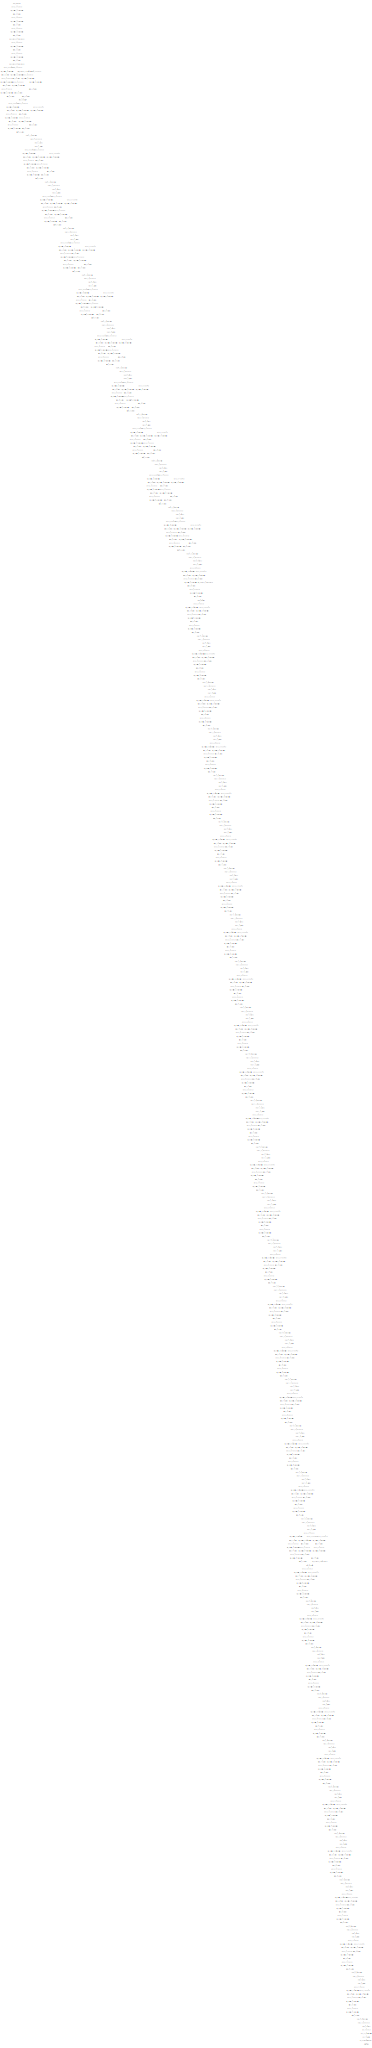

In [19]:
def createModel6():
    #base_model = ResNet50(include_top=True, weights='imagenet',input_shape=(224,224,3))
    base_model = keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=True, weights=None , input_tensor=None, input_shape=None, pooling=None, classes=1000)
    return base_model
model = createModel6()
plot_model(model, to_file='Inceptionresnet.png',show_shapes=True)
SVG(model_to_dot(model).create(prog='dot',format='svg'))

In [2]:
def createModel7():
    #base_model= keras.applications.inception_v3.InceptionV3(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3,3),strides=2, activation='relu',input_shape=(224,224,3),name='layer1'))
    model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', name='Layer1_norm'))
    model.add(Activation('relu',name='layer1_act'))
    
    model.add(Conv2D(filters=32, kernel_size=(3,3),strides=1, activation='relu',name='layer2'))
    model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', name='Layer2_norm'))
    model.add(Activation('relu',name='layer2_act'))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3),strides=1, activation='relu',name='layer3'))
    model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', name='Layer3_norm'))
    model.add(Activation('relu',name='layer3_act'))
    model.add(MaxPooling2D(pool_size=(3,3), strides=2,name='layer3_pool'))
    
    model.add(Conv2D(filters=80, kernel_size=(3,3),strides=1, activation='relu',name='layer4'))
    model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', name='Layer4_norm'))
    model.add(Activation('relu',name='layer4_act'))
    
    model.add(Conv2D(filters=192, kernel_size=(3,3),strides=1, activation='relu',name='layer5'))
    model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', name='Layer5_norm'))
    model.add(Activation('relu',name='layer5_act'))
    model.add(MaxPooling2D(pool_size=(3,3), strides=2,name='layer5_pool'))
    
    
    model.add(Conv2D(filters=64, kernel_size=(3,3),strides=1, activation='relu',name='layer6', padding='same'))
    model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', name='Layer6_norm'))
    model.add(Activation('relu',name='layer6_act'))
    
    model.add(Conv2D(filters=48, kernel_size=(3,3),strides=1, activation='relu',name='layer7', padding='same'))
    model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', name='Layer7_norm'))
    model.add(Activation('relu',name='layer7_act'))
        
    model.add(Conv2D(filters=96, kernel_size=(3,3),strides=1, activation='relu',name='layer8', padding='same'))
    model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', name='Layer8_norm'))
    model.add(Activation('relu',name='layer8_act'))
    
    model.add(Conv2D(filters=192, kernel_size=(3,3),strides=1,padding='same', activation='relu',name='layer9'))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=1,padding='same', data_format=None, name='layer9_Apool'))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3),strides=1, activation='relu',name='layer10', padding='same'))
    model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', name='Layer10_norm'))
    model.add(Activation('relu',name='layer10_act'))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3),strides=1, activation='relu',name='layer11', padding='same'))
    model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', name='Layer11_norm'))
    model.add(Activation('relu',name='layer11_act'))
    
    model.add(Conv2D(filters=96, kernel_size=(3,3),strides=1, activation='relu',name='layer12', padding='same'))
    model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', name='Layer12_norm'))
    model.add(Activation('relu',name='layer12_act'))
    
    model.add(Conv2D(filters=32, kernel_size=(3,3),strides=1, activation='relu',name='layer13', padding='same'))
    model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', name='Layer13_norm'))
    model.add(Activation('relu',name='layer13_act'))
    
    model.add(Flatten())
    model.add(Dense(2000,activation='relu'))

    model.add(Dense(48,activation='softmax'))
    
    #print(model.summary())
    return model

#createModel7()